In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', "notebook", "grid"])

# Problem 1
Change the dummy index $n+1 \rightarrow n$, we get
$$P_n = 2xP_{n-1}-P_{n-2}-\frac{xP_{n-1} - P_{n-2}}{n}$$

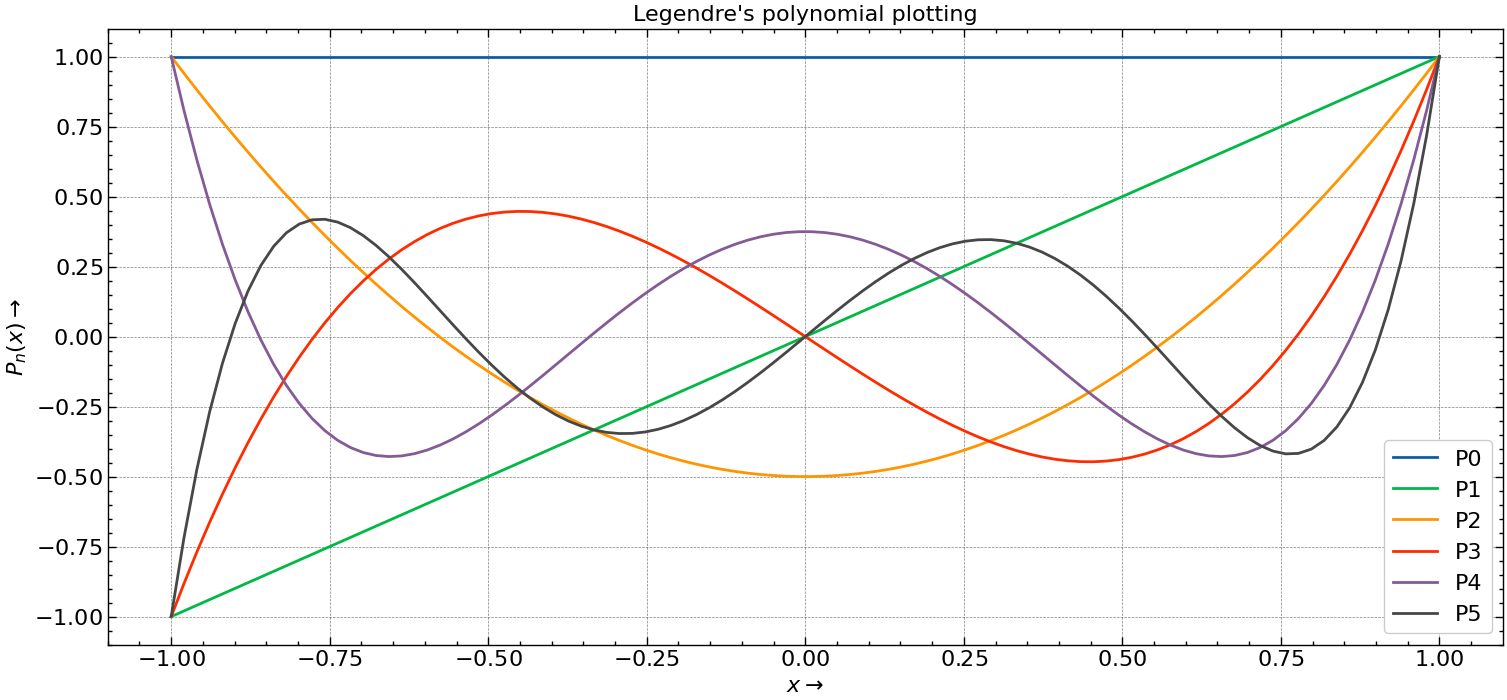

In [2]:
def P(n, x):
    if n == 0:
        return x**0
    elif n == 1:
        return x
    else:
        return 2*x*P(n-1, x) - P(n-2, x) - (x*P(n-1, x) - P(n-2, x))/n

N = 100
x = np.linspace(-1, 1, N)

#Plotting 
plt.figure(figsize=(18, 8))
plt.title("Legendre's polynomial plotting")
for i in range(6):
    plt.plot(x, P(i, x), label = "P" + str(i))
    plt.legend(loc = "best")
plt.xlabel(r"$x \rightarrow$")
plt.ylabel(r"$P_n(x) \rightarrow$")
plt.show()

# Problem 2

In [3]:
def Integral(x, y):
    h = x[1]-x[0]
    #Trapezoidal method
    return 0.5*h*(y[0] + y[-1] + 2*sum(y[1:-1]))

x = np.linspace(-1, 1, 10000)
# case 1: m ≠ n
m = 3; n = 5
y = P(m, x)*P(n, x)
print(f"For m = {m} and n = {n}, the integral will be {round(Integral(x, y), 3)}.")

# case 1: m = n
m = 5; n = 5
y = P(m, x)*P(n, x)
print(f"For m = {m} and n = {n}, the integral will be {round(Integral(x, y), 3)}.")

For m = 3 and n = 5, the integral will be 0.0.
For m = 5 and n = 5, the integral will be 0.182.


# Problem 3

In [4]:
m = 10
M = np.zeros((m, m))

for i in range(m):
    for j in range(m):
        M[i][j] = round((i+0.5)*Integral(x, P(i, x)*P(j, x)), 2)
print(M)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


# Problem 4

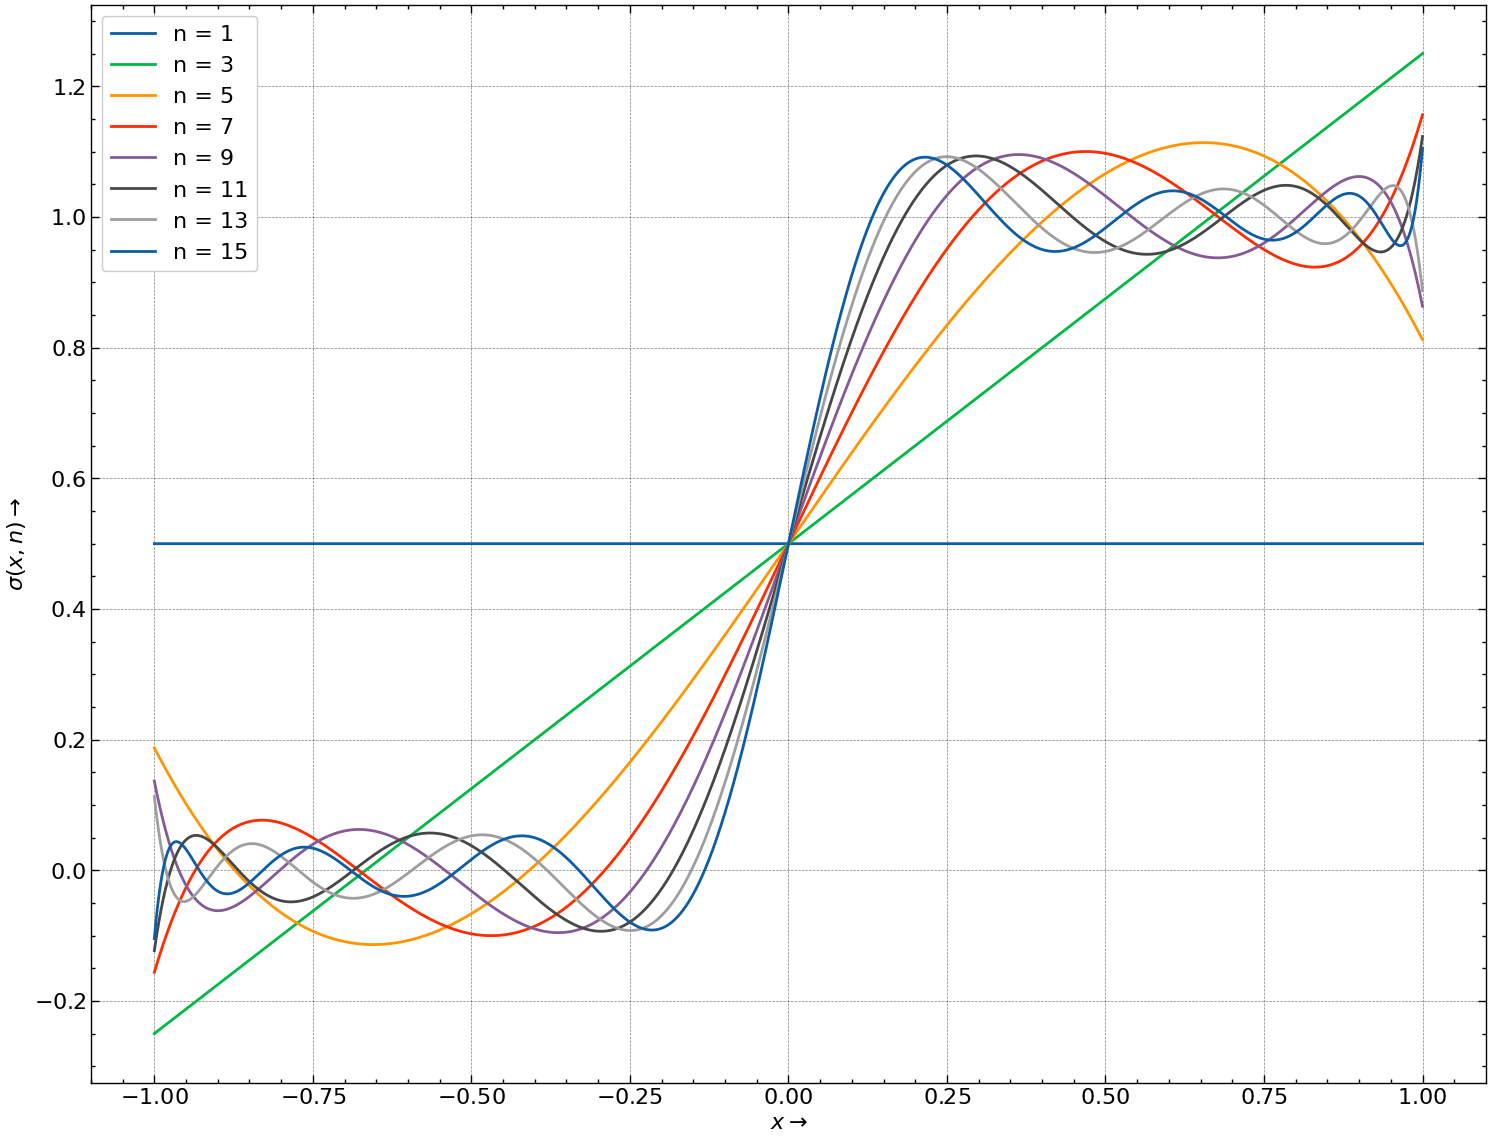

In [5]:
def C(l):
    # As for -1 < x < 0 the integral will be zero.
    # So we only have to compute for only positive x.
    return (l+ 0.5)*(Integral(x[x >= 0], 1*P(l, x[x>=0])))

def Sigma(x, n):
    S = 0
    for i in range(n):
        S += C(i)*P(i, x)
    return S

#Plotting
plt.figure(figsize=(18, 14))
for n in range(1, 16, 2):
    plt.plot(x, Sigma(x, n), label = "n = " + str(n))
    plt.legend(loc = "best")

plt.xlabel(r"$x \rightarrow$")
plt.ylabel(r"$\sigma(x, n) \rightarrow$")
plt.show()


## Observation
* As $n$ becomes larger and larger the curve is shifted towards the y axis.
* Oscillation becomes more dampped for $0 <|x| <1 $ as $n$ increases.
* We have also see this kind of behaviour in fourier series which is named *Gibbs Phenomenon*.